## This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/thai-dict/dict.txt


<h1> CNN Toxic Characters: การทำนายข้อความ </h1>

In [2]:
from datasets import load_dataset
dataset = load_dataset("thai_toxicity_tweet")

Generating train split:   0%|          | 0/3300 [00:00<?, ? examples/s]

Dataset thai_toxicity_tweet downloaded and prepared to /root/.cache/huggingface/datasets/thai_toxicity_tweet/thai_toxicity_tweet/1.0.0/6156251739b83a8e57f9ed4adf0f1d134e9bfded6d2870647558fdb7a0e60306. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
dataset['train'][0]

{'tweet_id': '898576382384418817',
 'tweet_text': 'วันๆ นี่คุยกะหมา แมว หมู ไก่ ม้า ควาย มากกว่าคุยกับคนไปละ',
 'toxic_votes': 0,
 'nontoxic_votes': 3,
 'is_toxic': 0}

In [4]:
d = {}
d['text'] = np.array([item['tweet_text'] for item in dataset['train']])
d['class'] = np.array([item['is_toxic'] for item in dataset['train']])
df = pd.DataFrame(d)
df

,text,class
0,วันๆ นี่คุยกะหมา แมว หมู ไก่ ม้า ควาย มากกว่าค...,0
1,TWEET_NOT_FOUND,1
2,หล่อมากกก หล่อวัวตายควายล้มกันเลยทีเดียวววว,0
3,สิวเหี้ยไรขึ้นหลังหู เสียชาติเกิดมั้ย เกิดมามั...,0
4,อ่ะ ป่วยก็ป่วย งานจ้างก็ต้องทำ งานเรียนก็ต้องท...,0
...,...,...
3295,ควย การตอบว่าเสือกนี่แม่งไม่ตรงประเด็นเหี้ยๆ,0
3296,ส้นตีนมากค่ะ อาเซียนร่วมใจจริงๆ -_-,1
3297,ไม่สวยก็เหนื่อยหน่อย ไม่หน่อยหรอกอีผี เหนื่อยฉ...,0
3298,นี่คือประเทศไทยในความจริง คนชั่วไม่ต้องติดคุกแ...,0


In [5]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [6]:
(df['text'] == 'TWEET_NOT_FOUND').sum()

506

In [7]:
notfound = df.index[df['text'] == 'TWEET_NOT_FOUND']
notfound

Int64Index([   1,   18,   38,   42,   49,   51,   53,   54,   59,   60,
            ...
            3208, 3215, 3224, 3230, 3248, 3250, 3259, 3260, 3267, 3291],
           dtype='int64', length=506)

In [8]:
df_clean = df.drop(notfound, axis=0)
df_clean

,text,class
0,วันๆ นี่คุยกะหมา แมว หมู ไก่ ม้า ควาย มากกว่าค...,0
2,หล่อมากกก หล่อวัวตายควายล้มกันเลยทีเดียวววว,0
3,สิวเหี้ยไรขึ้นหลังหู เสียชาติเกิดมั้ย เกิดมามั...,0
4,อ่ะ ป่วยก็ป่วย งานจ้างก็ต้องทำ งานเรียนก็ต้องท...,0
5,,1
...,...,...
3295,ควย การตอบว่าเสือกนี่แม่งไม่ตรงประเด็นเหี้ยๆ,0
3296,ส้นตีนมากค่ะ อาเซียนร่วมใจจริงๆ -_-,1
3297,ไม่สวยก็เหนื่อยหน่อย ไม่หน่อยหรอกอีผี เหนื่อยฉ...,0
3298,นี่คือประเทศไทยในความจริง คนชั่วไม่ต้องติดคุกแ...,0


In [9]:
notfound2 = df_clean.index[df_clean['text'] == '']

In [10]:
df_clean = df_clean.drop(notfound2, axis=0)
df_clean

,text,class
0,วันๆ นี่คุยกะหมา แมว หมู ไก่ ม้า ควาย มากกว่าค...,0
2,หล่อมากกก หล่อวัวตายควายล้มกันเลยทีเดียวววว,0
3,สิวเหี้ยไรขึ้นหลังหู เสียชาติเกิดมั้ย เกิดมามั...,0
4,อ่ะ ป่วยก็ป่วย งานจ้างก็ต้องทำ งานเรียนก็ต้องท...,0
6,นี่ก็เพิ่งรู้ว่า เกิดชาตินี้ชาติเดียว เป็นทั้ง...,1
...,...,...
3294,อินเดียเป็นประเทศที่เหี้ยสัสหมาจริงๆ กูโคตรเกล...,1
3295,ควย การตอบว่าเสือกนี่แม่งไม่ตรงประเด็นเหี้ยๆ,0
3296,ส้นตีนมากค่ะ อาเซียนร่วมใจจริงๆ -_-,1
3297,ไม่สวยก็เหนื่อยหน่อย ไม่หน่อยหรอกอีผี เหนื่อยฉ...,0


<AxesSubplot:xlabel='class'>

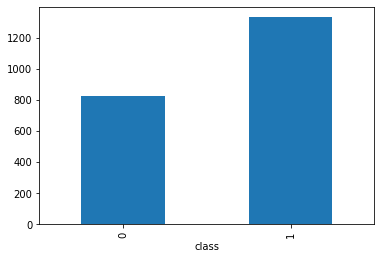

In [11]:
df_clean.groupby('class').count().plot(legend=False, kind='bar')

In [12]:
!pip install pythainlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 6.3 MB/s eta 0:00:00


In [13]:
from pythainlp.tokenize import word_tokenize
word_tokenize(df_clean['text'][0])

['วัน',
 'ๆ',
 ' ',
 'นี่',
 'คุย',
 'กะ',
 'หมา',
 ' ',
 'แมว',
 ' ',
 'หมู',
 ' ',
 'ไก่',
 ' ',
 'ม้า',
 ' ',
 'ควาย',
 ' ',
 'มากกว่า',
 'คุย',
 'กับ',
 'คน',
 'ไป',
 'ละ']

In [14]:
df_clean['text_clean'] = [' '.join(word_tokenize(item)) for item in df_clean['text']]
df_clean

,text,class,text_clean
0,วันๆ นี่คุยกะหมา แมว หมู ไก่ ม้า ควาย มากกว่าค...,0,วัน ๆ นี่ คุย กะ หมา แมว หมู ไก่ ม้า...
2,หล่อมากกก หล่อวัวตายควายล้มกันเลยทีเดียวววว,0,หล่อ มาก กก หล่อ วัว ตาย ควาย ล้ม กัน เลย ที...
3,สิวเหี้ยไรขึ้นหลังหู เสียชาติเกิดมั้ย เกิดมามั...,0,สิว เหี้ย ไร ขึ้น หลัง หู เสียชาติเกิด มั้ย ...
4,อ่ะ ป่วยก็ป่วย งานจ้างก็ต้องทำ งานเรียนก็ต้องท...,0,อ่ะ ป่วย ก็ ป่วย งาน จ้าง ก็ ต้อง ทำ งาน...
6,นี่ก็เพิ่งรู้ว่า เกิดชาตินี้ชาติเดียว เป็นทั้ง...,1,นี่ ก็ เพิ่ง รู้ ว่า เกิด ชาติ นี้ ชาติ เดีย...
...,...,...,...
3294,อินเดียเป็นประเทศที่เหี้ยสัสหมาจริงๆ กูโคตรเกล...,1,อินเดีย เป็น ประเทศ ที่ เหี้ย สัส หมา จริงๆ ...
3295,ควย การตอบว่าเสือกนี่แม่งไม่ตรงประเด็นเหี้ยๆ,0,ควย การ ตอบ ว่า เสือก นี่ แม่ ง ไม่ ตรงประเด...
3296,ส้นตีนมากค่ะ อาเซียนร่วมใจจริงๆ -_-,1,ส้นตีน มาก ค่ะ อาเซียน ร่วมใจ จริงๆ - _ -
3297,ไม่สวยก็เหนื่อยหน่อย ไม่หน่อยหรอกอีผี เหนื่อยฉ...,0,ไม่ สวย ก็ เหนื่อย หน่อย ไม่ หน่อย หรอก อี ผ...


In [15]:
from nltk.tokenize import word_tokenize #tokenize เพื่อสามารถเอาเข้าโมเดลของต่างชาติได้

def tokenize(texts):
    max_len = 0
    tokenized_texts = []
    word2idx = {}
    word2idx['<pad>'] = 0
    word2idx['<unk>'] = 1 #หาไม่เจอ
    idx = 2
    for sent in texts:
        tokenized_sent = word_tokenize(sent)
        tokenized_texts.append(tokenized_sent)
        for token in tokenized_sent:
            if token not in word2idx:
                word2idx[token] = idx
                idx += 1
        max_len = max(max_len, len(tokenized_sent))
    return tokenized_texts, word2idx, max_len

def encode(tokenized_texts, word2idx, max_len):
    input_ids = []
    for tokenized_sent in tokenized_texts:
        tokenized_sent += ['<pad>'] * (max_len - len(tokenized_sent))
        input_id = [word2idx.get(token) for token in tokenized_sent]
        input_ids.append(input_id)    
    return np.array(input_ids)

In [16]:
Xo = df_clean['text_clean']
yo = df_clean['class']

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_tmp, y, y_tmp = train_test_split(Xo, yo, test_size=0.4, random_state=0, stratify=yo)
X_val, X_test, yv, yt = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=0, stratify=y_tmp)

In [18]:
import numbers
tok_text_train, word2idx, max_len = tokenize(X_train) #ขนาดยาวที่สุดเท่าไหร่
tok_text_val, _, _ = tokenize(X_val)
tok_text_test, _, _ = tokenize(X_test)

X_train_num = encode(tok_text_train, word2idx, max_len) #ถ้าหาคำนั้นไม่เจอเจอใส่เป็น 1 ไว้
X_val_num = encode(tok_text_val, word2idx, max_len)
X_val_num = np.array([[item2 if isinstance(item2, numbers.Number) else 1 for item2 in item] for item in X_val_num])
X_test_num = encode(tok_text_test, word2idx, max_len)
X_test_num = np.array([[item2 if isinstance(item2, numbers.Number) else 1 for item2 in item] for item in X_test_num])

In [19]:
X_train_num

array([[   2,    3,    4, ...,    0,    0,    0],
       [  22,   23,   24, ...,    0,    0,    0],
       [  38,   39,   40, ...,    0,    0,    0],
       ...,
       [  66, 4374, 4375, ...,    0,    0,    0],
       [  83,   84, 2438, ...,    0,    0,    0],
       [3846, 2808, 4380, ...,    0,    0,    0]])

In [20]:
X_train_num.shape

(1296, 59)

In [21]:
len(word2idx)

4382

In [22]:
word2idx

{'<pad>': 0,
 '<unk>': 1,
 'อีดอก': 2,
 'กก': 3,
 'ก': 4,
 'เขา': 5,
 'มี': 6,
 'แฟน': 7,
 'แล้ว': 8,
 'จริง': 9,
 'ด้วย': 10,
 'ดี': 11,
 'นะ': 12,
 'ตอนนี้': 13,
 'ยัง': 14,
 'แค่': 15,
 'วี๊ด': 16,
 'เฉย': 17,
 'ๆ': 18,
 'โอ้ย': 19,
 'ยยย': 20,
 '😂': 21,
 'แต่': 22,
 'รบ': 23,
 '.': 24,
 'ไหน': 25,
 'ที่': 26,
 'ไม่': 27,
 'แจก': 28,
 'ห่า': 29,
 'เหว': 30,
 'อะไร': 31,
 'เลย': 32,
 'ด่า': 33,
 'ทุก': 34,
 'อัน': 35,
 'อ่ะ': 36,
 '...': 37,
 'สังคม': 38,
 'ดัดจริต': 39,
 'หรือ': 40,
 'คน': 41,
 'หน้าตา': 42,
 'ทำ': 43,
 'ก็': 44,
 'ผิด': 45,
 'today': 46,
 'line': 47,
 'me': 48,
 '/': 49,
 'TH': 50,
 'article': 51,
 '%': 52,
 'E': 53,
 '0': 54,
 '…': 55,
 '#': 56,
 'LINETODAY': 57,
 'อยู่': 58,
 'เมือง': 59,
 'ชีวิต': 60,
 'ต้อง': 61,
 'ป๊อป': 62,
 'เพื่อน': 63,
 'บาง': 64,
 'ประเภท': 65,
 'อยาก': 66,
 'ให้': 67,
 'เยื่อ': 68,
 'แก้วหู': 69,
 'ขาด': 70,
 'อี': 71,
 'สัส': 72,
 'ขี้': 73,
 'นินทา': 74,
 'นัก': 75,
 'ชั่ว': 76,
 'ตบ': 77,
 'สันดาน': 78,
 'ขี้โกง': 79,
 'นี่': 80,
 'แม

In [23]:
import torch
import torch.nn.functional as F
class MLP_CNN(torch.nn.Module):
    def __init__(self, n_inputs,vocab_size,num_classes,dropout):
        super(MLP_CNN, self).__init__()
        self.embedding = torch.nn.Embedding(num_embeddings=vocab_size,embedding_dim=100,padding_idx=0,max_norm=5.0) ##สำคัญ
        self.cov1d = torch.nn.Conv1d(in_channels=100,out_channels=50,kernel_size=3) ##สำคัญ ออกมา 50
        self.output = torch.nn.Linear(50, num_classes) ##ออกมา 50
        self.dropout = torch.nn.Dropout(p=dropout) #dropout ตัดสัญญาณ
    
    def forward(self, X):
        X = self.embedding(X) #ส่วนที่ออกข้อสอบว่าสร้างยังไง
        X = X.permute(0,2,1) ##อันนี้ยาก การสลับตำแหน่งให้วิ่งเข้าข้อมูล ไม่ถามตอนออกข้อสอบแน่ๆ
        X = F.relu(self.cov1d(X)) #เรียก lelu มารับ
        X = F.max_pool1d(X, kernel_size=X.shape[2]).squeeze(dim=2)
        X = self.output(self.dropout(X))
        return X

In [24]:
import torch
import torch.nn.functional as F
class MLP_CNN(torch.nn.Module):
    def __init__(self, n_inputs,vocab_size,num_classes,dropout):
        super(MLP_CNN, self).__init__()
        self.embedding = torch.nn.Embedding(num_embeddings=vocab_size,embedding_dim=100,padding_idx=0,max_norm=5.0) 
        self.cov1d = torch.nn.Conv1d(in_channels=100,out_channels=50,kernel_size=3) 
        self.output = torch.nn.Linear(50, num_classes) 
        self.dropout = torch.nn.Dropout(p=dropout) 
    
    def forward(self, X):
        X = self.embedding(X) 
        X = X.permute(0,2,1) 
        X = F.relu(self.cov1d(X))
        X = F.max_pool1d(X, kernel_size=X.shape[2]).squeeze(dim=2)
        X = self.output(self.dropout(X))
        return X

In [25]:
X_train_num 

array([[   2,    3,    4, ...,    0,    0,    0],
       [  22,   23,   24, ...,    0,    0,    0],
       [  38,   39,   40, ...,    0,    0,    0],
       ...,
       [  66, 4374, 4375, ...,    0,    0,    0],
       [  83,   84, 2438, ...,    0,    0,    0],
       [3846, 2808, 4380, ...,    0,    0,    0]])

In [26]:
from torch.utils.data import DataLoader, TensorDataset
X = torch.from_numpy(X_train_num.astype(np.int64)) 
y = torch.from_numpy(y.values.astype(np.int64))
Xv = torch.from_numpy(X_val_num.astype(np.int64))
yv = torch.from_numpy(yv.values.astype(np.int64))
Xt = torch.from_numpy(X_test_num.astype(np.int64))
yt = torch.from_numpy(yt.values.astype(np.int64))

train_dl = DataLoader(TensorDataset(X, y), batch_size=50, shuffle=True)
val_dl = DataLoader(TensorDataset(Xv, yv), batch_size=50, shuffle=False)
test_dl = DataLoader(TensorDataset(Xt, yt), batch_size=50, shuffle=False)

In [27]:
n_train, n_feat = X.shape
model = MLP_CNN(n_feat,len(word2idx),2, 0.5) 
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
for epoch in range(30):
    model.train() # Model in training mode
    tr_loss = []
    for i, (inputs, targets) in enumerate(train_dl):
        optimizer.zero_grad() # Clear gradients 
        output = model(inputs) # Use forward pass
        l= loss(output, targets) # Calculate loss
        l.backward() # Calculate gradients
        optimizer.step() # Update model
        tr_loss.append(l.item())
        
    model.eval() # Model in evaluation mode
    val_loss = []
    val_acc = []
    for i, (inputs, targets) in enumerate(val_dl):
        with torch.no_grad():
            output = model(inputs)
        l= loss(output, targets)
        yp = torch.argmax(output, dim=1).flatten()
        val_acc.append( sum(yp==targets)/len(yp) )
        val_loss.append(l.item())
    
    print("Train loss "+str(np.mean(tr_loss))+",Val loss "+str(np.mean(val_loss))+",Val Acc "+str(np.mean(val_acc)))

Train loss 0.7040007274884444,Val loss 0.6545638640721639,Val Acc 0.6183333
Train loss 0.6370034676331741,Val loss 0.6389242675569322,Val Acc 0.6183333
Train loss 0.6061687882129962,Val loss 0.6314996414714389,Val Acc 0.6183333
Train loss 0.5718782463899026,Val loss 0.6210797958903842,Val Acc 0.6240278
Train loss 0.5385419921233103,Val loss 0.6111732721328735,Val Acc 0.64875
Train loss 0.4938124452645962,Val loss 0.6037370893690321,Val Acc 0.6531944
Train loss 0.4677070574118541,Val loss 0.5960458119710287,Val Acc 0.65986115
Train loss 0.41476345979250395,Val loss 0.5907609793874953,Val Acc 0.65763885
Train loss 0.3792651536372992,Val loss 0.5908004972669814,Val Acc 0.6643055
Train loss 0.3513423800468445,Val loss 0.58814803759257,Val Acc 0.67097217
Train loss 0.32240690978673786,Val loss 0.5886248383257124,Val Acc 0.6798611
Train loss 0.2984720434133823,Val loss 0.587592237525516,Val Acc 0.6865278
Train loss 0.24988969644674888,Val loss 0.5891515182124244,Val Acc 0.68875
Train loss 0.

<h1> Train </h1>

In [28]:
model.eval() # Model in evaluation mode
ts_loss = []
yp = []
for i, (inputs, targets) in enumerate(val_dl):
    with torch.no_grad():
        output = model(inputs)
    pred = torch.argmax(output, dim=1).flatten()
    yp = list(pred.cpu().numpy()) if len(yp) == 0 else yp + list(pred.cpu().numpy())     
sum(yp==yv.cpu().numpy())/len(yv)

0.6967592592592593

<h1> Test </h1>

In [29]:
model.eval() # Model in evaluation mode
ts_loss = []
yp = []
for i, (inputs, targets) in enumerate(test_dl):
    with torch.no_grad():
        output = model(inputs)
    pred = torch.argmax(output, dim=1).flatten()
    yp = list(pred.cpu().numpy()) if len(yp) == 0 else yp + list(pred.cpu().numpy())     
sum(yp==yt.cpu().numpy())/len(yt)

0.7152777777777778

In [30]:
test_text = ['ควย!!', 'เหี้ย!!', 'วันนี้ชีวิตคนไทยดีจังเรายังมีนายกคนดีคนเดิมอยู่กับเรา']

In [31]:
from pythainlp.tokenize import word_tokenize
test_text = [' '.join(word_tokenize(item)) for item in test_text]
test_text

['ควย !!',
 'เหี้ย !!',
 'วันนี้ ชีวิต คนไทย ดี จัง เรา ยังมี นายก คนดี คน เดิม อยู่ กับ เรา']

In [32]:
tok_text_test, _, _ = tokenize(test_text)
X_test_num = encode(tok_text_test, word2idx, max_len)
X_test_num = np.array([[item2 if isinstance(item2, numbers.Number) else 1 for item2 in item] for item in X_test_num])

In [33]:
Xt = torch.from_numpy(X_test_num.astype(np.int64))
yt = torch.from_numpy(np.zeros(len(Xt)).astype(np.int64))
test_dl = DataLoader(TensorDataset(Xt, yt), batch_size=50, shuffle=False)

In [34]:
model.eval() # Model in evaluation mode
ts_loss = []
yp = []
for i, (inputs,targets) in enumerate(test_dl):
    with torch.no_grad():
        output = model(inputs)
    pred = torch.argmax(output, dim=1).flatten()

In [35]:
pred

tensor([0, 0, 0])

In [36]:
output

tensor([[ 0.7243, -0.2318],
        [ 0.3728,  0.0770],
        [ 0.4357,  0.4310]])

In [37]:
test_text2 = ['นี่คนหรือขาโต๊ะ', 'หันหน้าหรือหันหลังก็เหมือนกัน', 'จะไปกันรอดหรอ', 'แต่งตัวอะไรเนี่ย', 'ไอโง่', 'อ้วน!!']

In [38]:
from pythainlp.tokenize import word_tokenize
test_text2 = [' '.join(word_tokenize(item)) for item in test_text2]
test_text2

['นี่ คน หรือ ขา โต๊ะ',
 'หันหน้า หรือ หันหลัง ก็ เหมือนกัน',
 'จะ ไป กัน รอด หรอ',
 'แต่งตัว อะไร เนี่ย',
 'ไอ โง่',
 'อ้วน !!']

In [39]:
tok_text_test, _, _ = tokenize(test_text2)
X_test_num = encode(tok_text_test, word2idx, max_len)
X_test_num = np.array([[item2 if isinstance(item2, numbers.Number) else 1 for item2 in item] for item in X_test_num])

In [40]:
Xt = torch.from_numpy(X_test_num.astype(np.int64))
yt = torch.from_numpy(np.zeros(len(Xt)).astype(np.int64))
test_dl = DataLoader(TensorDataset(Xt, yt), batch_size=50, shuffle=False)

In [41]:
model.eval() # Model in evaluation mode
ts_loss = []
yp = []
for i, (inputs,targets) in enumerate(test_dl):
    with torch.no_grad():
        output = model(inputs)
    pred = torch.argmax(output, dim=1).flatten()

In [42]:
pred

tensor([0, 0, 1, 0, 0, 0])